In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("survey.csv")

# Filter out unrealistic ages
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)].copy()

# Normalize gender values
def normalize_gender(g):
    g = str(g).strip().lower()
    if g in ['male', 'm', 'man', 'male-ish', 'maile', 'mal', 'msle', 'mail', 'cis male']:
        return 'Male'
    elif g in ['female', 'f', 'woman', 'femake', 'cis female', 'female (cis)']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(normalize_gender)

df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2]:
# Calculate proportion of people who sought treatment per country
country_treatment = df.groupby('Country')['treatment'].value_counts(normalize=True).unstack().fillna(0)

# Get top 10 countries with highest 'Yes' rate
top_countries = country_treatment.sort_values('Yes', ascending=False).head(10)

top_countries


treatment,No,Yes
Country,,
Japan,0.000000,1.000000
Croatia,0.000000,1.000000
Slovenia,0.000000,1.000000
Moldova,0.000000,1.000000
Denmark,0.000000,1.000000
South Africa,0.333333,0.666667
New Zealand,0.375000,0.625000
Australia,0.380952,0.619048
Poland,0.428571,0.571429


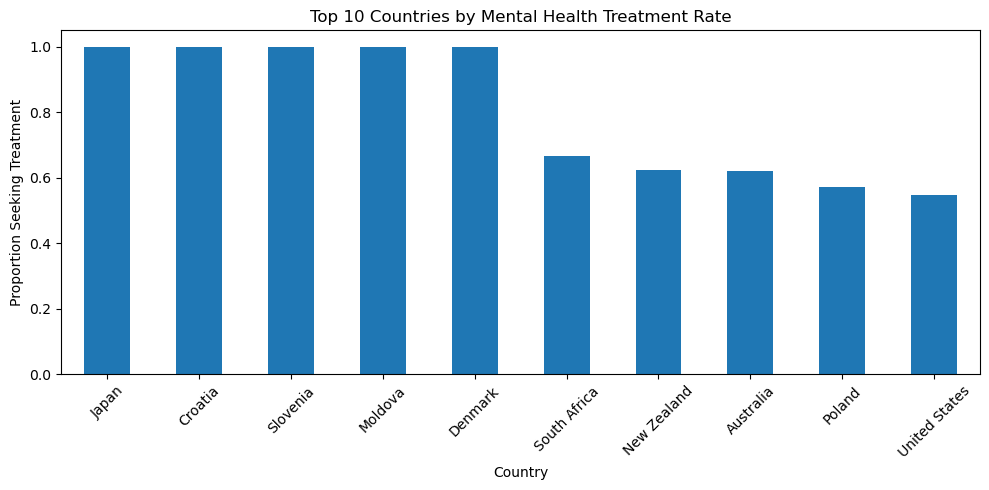

In [3]:
import matplotlib.pyplot as plt

top_countries['Yes'].plot(kind='bar', figsize=(10, 5), title='Top 10 Countries by Mental Health Treatment Rate')
plt.ylabel('Proportion Seeking Treatment')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
# Calculate attitude ratios
mental_vs_physical = df.groupby('Country')['mental_vs_physical'].value_counts(normalize=True).unstack().fillna(0)

# Use same top countries from treatment for comparison
top_attitudes = mental_vs_physical.loc[top_countries.index]

top_attitudes[['Yes', 'No']]


mental_vs_physical,Yes,No
Country,,
Japan,0.000000,1.000000
Croatia,0.500000,0.500000
Slovenia,0.000000,0.000000
Moldova,0.000000,0.000000
Denmark,1.000000,0.000000
South Africa,0.166667,0.666667
New Zealand,0.125000,0.375000
Australia,0.333333,0.380952
Poland,0.571429,0.142857


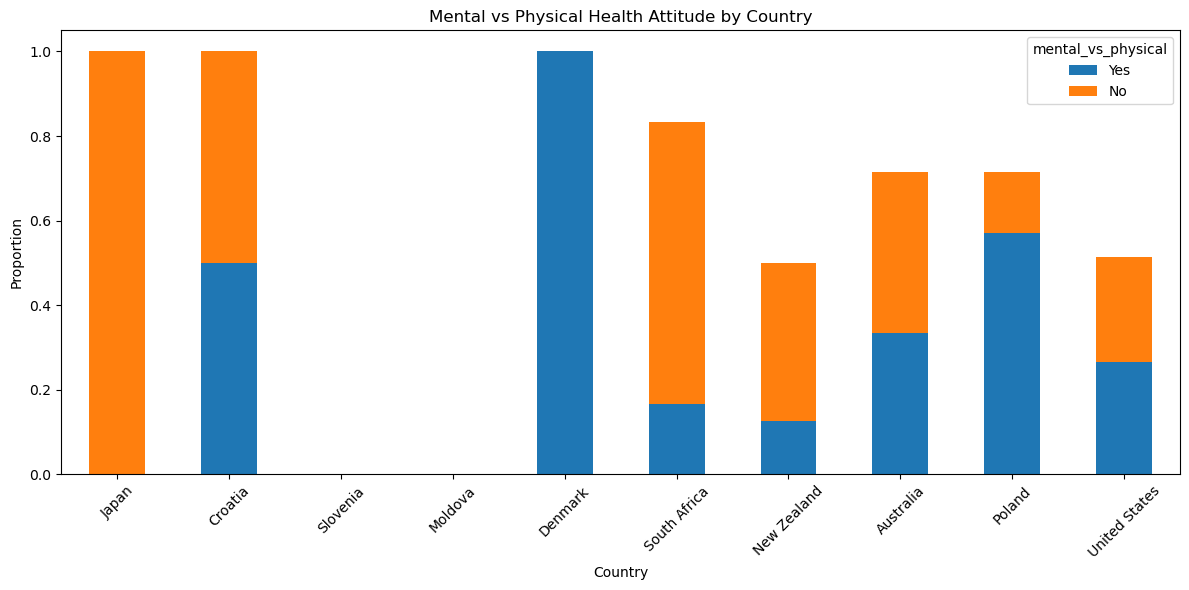

In [5]:
top_attitudes[['Yes', 'No']].plot(kind='bar', stacked=True, figsize=(12, 6), 
                                  title='Mental vs Physical Health Attitude by Country')
plt.ylabel('Proportion')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
# Define binary mapping
binary_map = {'Yes': 1, 'No': 0, 'Maybe': 0.5, "Don't know": np.nan}

# Copy and apply mapping
df_bin = df.copy()
cols_to_map = ['family_history', 'treatment', 'remote_work', 'tech_company', 'benefits',
               'care_options', 'wellness_program', 'seek_help', 'anonymity',
               'mental_health_consequence', 'phys_health_consequence',
               'coworkers', 'supervisor', 'mental_health_interview',
               'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

for col in cols_to_map:
    df_bin[col + '_bin'] = df_bin[col].map(binary_map)

df_bin[[col + '_bin' for col in cols_to_map]].head()


,family_history_bin,treatment_bin,remote_work_bin,tech_company_bin,benefits_bin,care_options_bin,wellness_program_bin,seek_help_bin,anonymity_bin,mental_health_consequence_bin,phys_health_consequence_bin,coworkers_bin,supervisor_bin,mental_health_interview_bin,phys_health_interview_bin,mental_vs_physical_bin,obs_consequence_bin
0,0.0,1.0,0.0,1.0,1.0,NaN,0.0,1.0,1.0,0.0,0.0,NaN,1.0,0.0,0.5,1.0,0.0
1,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.5,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,0.5,0.5,0.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,1.0,1.0,1.0,NaN,0.0


In [9]:
# Recalculate correlations in case they were lost
correlations = df_bin.corr(numeric_only=True)['treatment_bin'].sort_values(ascending=False)

# Show top positive predictors
print("🔎 Strongest Predictors of Seeking Treatment:")
print(correlations.drop('treatment_bin').head(10))



🔎 Strongest Predictors of Seeking Treatment:
family_history_bin               0.376674
care_options_bin                 0.277824
benefits_bin                     0.156391
obs_consequence_bin              0.152524
mental_health_consequence_bin    0.125554
coworkers_bin                    0.113767
seek_help_bin                    0.082436
wellness_program_bin             0.075510
Age                              0.073627
phys_health_consequence_bin      0.044666
Name: treatment_bin, dtype: float64


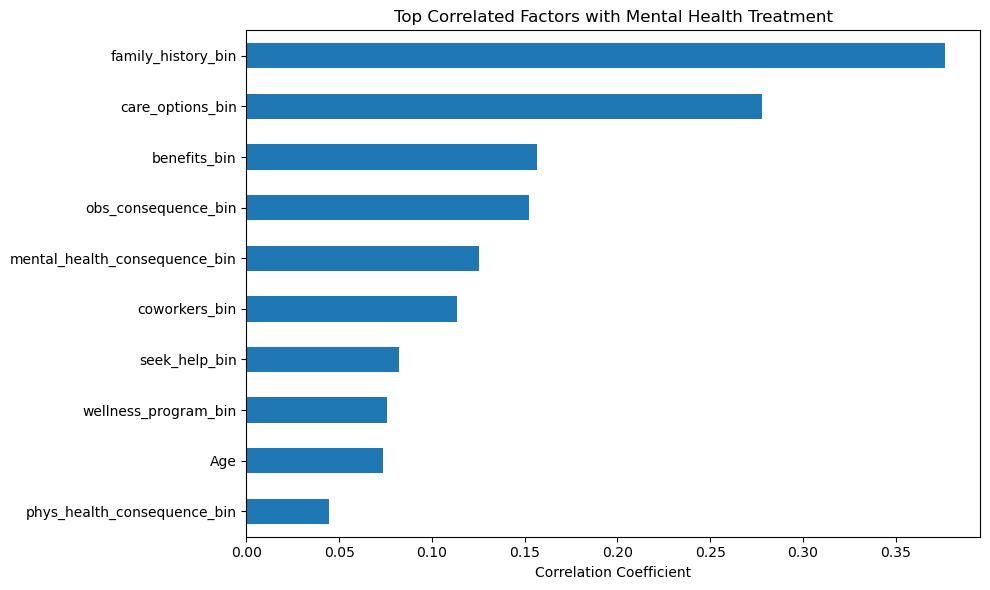

In [10]:
# STEP 8: Plotting
import matplotlib.pyplot as plt

top_predictors = correlations.drop('treatment_bin').head(10)

plt.figure(figsize=(10, 6))
top_predictors.plot(kind='barh', title='Top Correlated Factors with Mental Health Treatment')
plt.xlabel('Correlation Coefficient')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


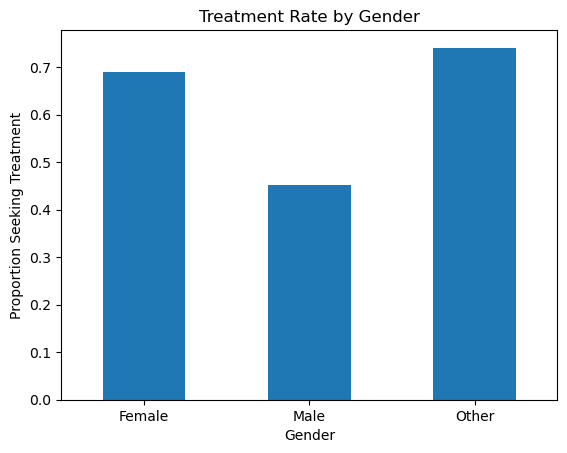

treatment,No,Yes
Gender,,
Female,0.310204,0.689796
Male,0.547497,0.452503
Other,0.259259,0.740741


In [11]:
# Proportion of each gender seeking treatment
treatment_by_gender = df.groupby('Gender')['treatment'].value_counts(normalize=True).unstack().fillna(0)

# Visualize
treatment_by_gender['Yes'].plot(kind='bar', title='Treatment Rate by Gender', ylabel='Proportion Seeking Treatment')
plt.xticks(rotation=0)
plt.show()

treatment_by_gender


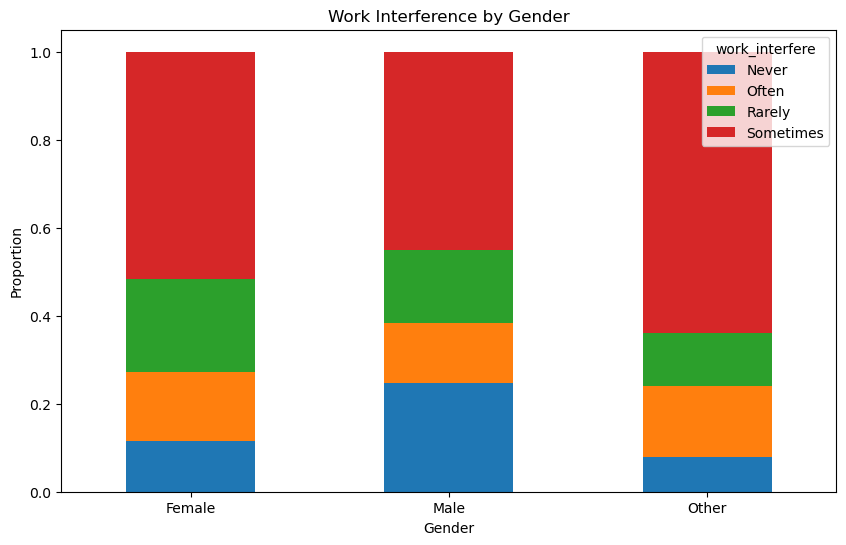

work_interfere,Never,Often,Rarely,Sometimes
Gender,,,,
Female,0.114833,0.157895,0.210526,0.516746
Male,0.246358,0.136424,0.166887,0.450331
Other,0.080000,0.160000,0.120000,0.640000


In [12]:
# Normalize work interference by gender
interfere_by_gender = df.groupby('Gender')['work_interfere'].value_counts(normalize=True).unstack().fillna(0)

# Visualize
interfere_by_gender.plot(kind='bar', stacked=True, figsize=(10,6), title='Work Interference by Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

interfere_by_gender


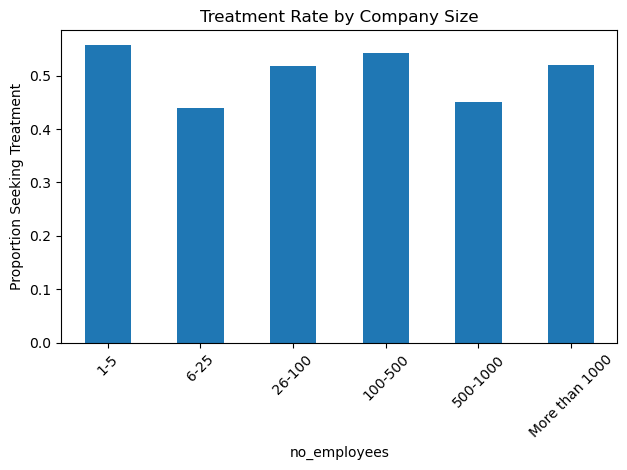

treatment,No,Yes
no_employees,,
1-5,0.443038,0.556962
6-25,0.560554,0.439446
26-100,0.482639,0.517361
100-500,0.457143,0.542857
500-1000,0.550000,0.450000
More than 1000,0.480427,0.519573


In [13]:
# Normalize treatment counts by company size
treatment_by_size = df.groupby('no_employees')['treatment'].value_counts(normalize=True).unstack().fillna(0)

# Sort by size label order
size_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
treatment_by_size = treatment_by_size.reindex(size_order)

# Plot
treatment_by_size['Yes'].plot(kind='bar', title='Treatment Rate by Company Size', ylabel='Proportion Seeking Treatment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

treatment_by_size


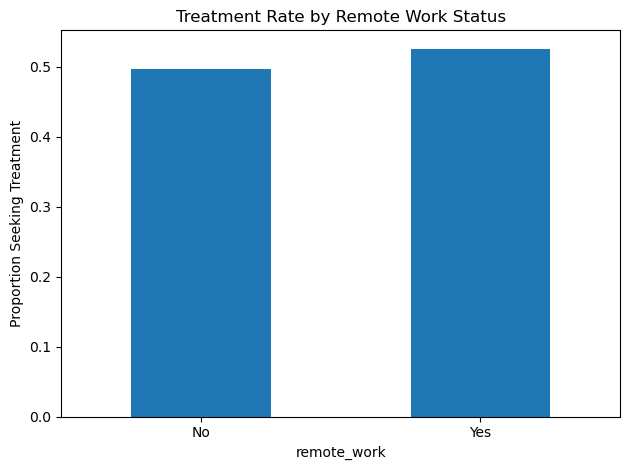

treatment,No,Yes
remote_work,,
No,0.503409,0.496591
Yes,0.474394,0.525606


In [14]:
# Normalize remote vs office treatment rates
treatment_by_remote = df.groupby('remote_work')['treatment'].value_counts(normalize=True).unstack().fillna(0)

# Plot
treatment_by_remote['Yes'].plot(kind='bar', title='Treatment Rate by Remote Work Status', ylabel='Proportion Seeking Treatment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

treatment_by_remote


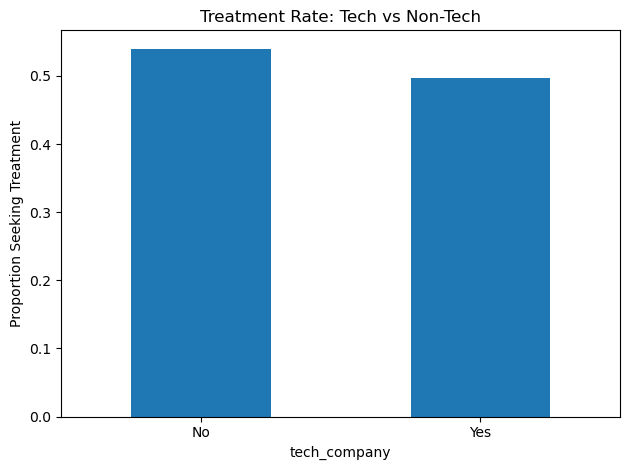

treatment,No,Yes
tech_company,,
No,0.460177,0.539823
Yes,0.502439,0.497561


In [15]:
# Normalize treatment rates in tech vs non-tech companies
treatment_by_industry = df.groupby('tech_company')['treatment'].value_counts(normalize=True).unstack().fillna(0)

# Plot
treatment_by_industry['Yes'].plot(kind='bar', title='Treatment Rate: Tech vs Non-Tech', ylabel='Proportion Seeking Treatment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

treatment_by_industry


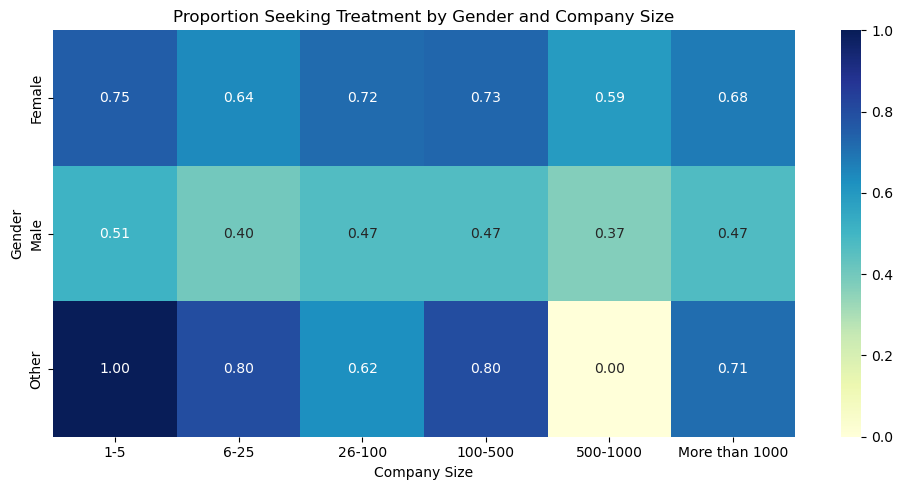

no_employees,1-5,6-25,26-100,100-500,500-1000,More than 1000
Gender,,,,,,
Female,0.750000,0.641026,0.716981,0.727273,0.590909,0.677966
Male,0.507812,0.400000,0.466960,0.468254,0.368421,0.469767
Other,1.000000,0.800000,0.625000,0.800000,0.000000,0.714286


In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

# Define consistent company size order
size_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Filter out rows with missing Gender or no_employees
df_filtered = df[df['Gender'].notna() & df['no_employees'].notna()]

# Count people who sought treatment
treated = df_filtered[df_filtered['treatment'] == 'Yes'].groupby(['Gender', 'no_employees']).size().unstack(fill_value=0)

# Count all people
total = df_filtered.groupby(['Gender', 'no_employees']).size().unstack(fill_value=0)

# Calculate rate (treated / total)
rate = treated / total

# Reorder columns for consistent display
rate = rate.reindex(columns=size_order).fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(rate, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Proportion Seeking Treatment by Gender and Company Size')
plt.xlabel('Company Size')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

# Display the table too
rate
